<a href="https://colab.research.google.com/github/Dineshkumar013/Titanic-eda-DATA-visualization/blob/main/titanic_eda_and_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='background:#FFFFFF; border:0; color:black'><center>Titanic: <span style="color:red">EDA</span> and <span style="color:blue">Data Visualization</span><center><h2>

![](https://upload.wikimedia.org/wikipedia/commons/f/fd/RMS_Titanic_3.jpg)
* [Image Source](https://en.wikipedia.org/wiki/Titanic)

* In this notebook, we visualize and analyze titanic data by using Plotly.
* If you like this notebook, please **give an upvote!**.
* Reference:  [Plotly Official Website](https://plotly.com/)

<h2 style='background:#FFFFFF; border:0; color:black'><center>What is "Plotly"?<center><h2>

* **Plotly** is one of the most popular data visualization library.
* Among kagglers, matplotlib or seaborn are more popular, but I recommend Plotly.
* This is because that you can draw beautiful graphs easily by using Plotly.

# import libraries

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Reading csv files

In [ ]:
train = pd.read_csv('/content/train.csv')


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h2 style='background:#FFFFFF; border:0; color:black'><center>Data Visualization using Plotly<center><h2>

# Survived or Not (train only)

* The column "Survived" is the target.
* In titanic competition, we have to predict it.
* If a passenger's  <span style="color:red">"Survived" is 1</span>, it means that he/she could survive, but if <span style="color:blue">it is 0</span>, it means that he/she could not survive.

In [ ]:
train["Survived"] = ["Survived" if i == 1 else "Not Survived" for i in train["Survived"]]

In [ ]:
fig = px.histogram(train, x="Survived",title="How many passengers survived?")
fig.show()

# Pcalss (train and test)

* The column "Pclass" shows the ticket class.

| Pclass | Ticket Class |
| --- | --- |
| 1 |  1st class|
| 2 | 2nd class|
| 3 | 3rd class|

In [ ]:
def pclass_changes(df):
    df["Pclass"] = ["1st" if i == 1 else i for i in df["Pclass"]]
    df["Pclass"] = ["2nd" if i == 2 else i for i in df["Pclass"]]
    df["Pclass"] = ["3rd" if i == 3 else i for i in df["Pclass"]]
    
    return df

In [ ]:
train = pclass_changes(train)


In [ ]:
fig = px.histogram(train, x="Pclass",title="Pclass(train.csv)",labels={"Pclass":"Ticket Class"})
fig.show()

# Sex (train and test)

In [ ]:
fig = px.histogram(train, x="Sex",title="Male or Female(train.csv)")
fig.show()

# Age (train and test)

In [ ]:
fig = px.histogram(train, x="Age",title="How old were the passengers? (train.csv)")
fig.show()

# SibSp (train and test)

* The column "SibSp" shows the number of siblings / spouses aboard the Titanic.

In [ ]:
fig = px.histogram(train, x="SibSp",
                   title="Did the passengers board with their siblings or spouse? (train.csv)",
                  labels={"SibSp":"Number of siblings or spouse abroad the Titanic"})
fig.show()

# Parch (train and test)

* The column Parch shows the number of  parents / children aboard the Titanic.

In [ ]:
fig = px.histogram(train, x="Parch",
                   title="Did the passengers board with their parents or chidren? (train.csv)",
                  labels={"Parch":"Number of parents or children abroad the Titanic"})
fig.show()

# Fare (train and test)

In [ ]:
fig = px.histogram(train, x="Fare",title="How much did the passengers pay to get on the Titanic? (train.csv)")
fig.show()

# Embarked(train and test)

* The column "Embarked" shows the name of port where passengers went on board.

In [ ]:
def Embarked_changes(df):
    #df["Embarked"] = df["Embarked"].dropna()
    df["Embarked"] = ["Cherbourg" if i == "C" else i for i in df["Embarked"] ]
    df["Embarked"] = ["Queenstown" if i == "Q" else i for i in df["Embarked"]]
    df["Embarked"] = ["Southampton" if i == "S" else i for i in df["Embarked"]]
    
    return df

In [ ]:
train = Embarked_changes(train)


In [ ]:
fig = px.histogram(train, x="Embarked",
                   title="Which port did the passengers embark? (train.csv)",
                   labels={"Embarked":"Port of Embarkation"})
fig.show()

<h2 style='background:#FFFFFF; border:0; color:black'><center>Data Analytics with Graph<center><h2>

# The correlation between "Survived" and "Sex"

In [ ]:
survived_or_not_male = [0,0]
survived_or_not_female = [0,0]

for i in train[train["Survived"] != "Survived"]["Sex"]:
    if i == "male":
        survived_or_not_male[0] += 1
    elif i == "female":
        survived_or_not_female[0] += 1

for i in train[train["Survived"] == "Survived"]["Sex"]:
    if i == "male":
        survived_or_not_male[1] += 1
    elif i == "female":
        survived_or_not_female[1] += 1

In [ ]:
survived_sex = pd.DataFrame(data=[[survived_or_not_male[0],survived_or_not_female[0]],[survived_or_not_male[1],survived_or_not_female[1]]],
                           columns=['male','female'],index=['Not Survived','Survived'])

In [ ]:
survived_sex

,male,female
Not Survived,468,81
Survived,109,233


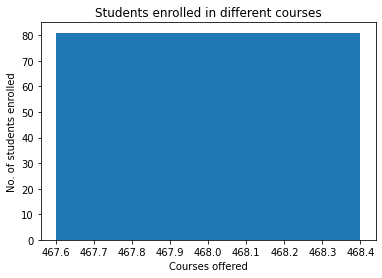

In [ ]:
plt.bar(survived_or_not_male[0],survived_or_not_female[0])

plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

In [ ]:
fig = plt.bar(survived_sex,x="female",title="Survived or Not (Female)")
fig.show()

NameError: ignored

# Survival Rate by gender
* Male: <span style="color: blue; ">18.89%</span> (109/577)
* Female: <span style="color: red; ">74.20%</span> (233/314)

* In this notebook,especially <span style="color: red; ">high</span>/<span style="color: blue; ">low</span> rates are written in <span style="color: red; ">red</span>/<span style="color: blue; ">blue</span>.

* These graphs imply that more women survived than men.

# The correlation between "Survived" and "Age"

In [ ]:
survived_age = [0,0,0,0]
survived_not_age = [0,0,0,0]
for i in train[train["Survived"] != "Survived"]["Age"]:
    if i < 20.0:
        survived_not_age[0] += 1
    elif i < 40.0:
        survived_not_age[1] += 1
    elif i < 60.0:
        survived_not_age[2] += 1
    else:
        survived_not_age[3] += 1
        
for i in train[train["Survived"] == "Survived"]["Age"]:
    if i < 20.0:
        survived_age[0] += 1
    elif i < 40.0:
        survived_age[1] += 1
    elif i < 60.0:
        survived_age[2] += 1
    else:
        survived_age[3] += 1

In [ ]:
survived_or_not_age = pd.DataFrame(data=[[survived_age[0],survived_age[1],survived_age[2],survived_age[3]],[survived_not_age[0],survived_not_age[1],survived_not_age[2],survived_not_age[3]]],
                           columns=['0~20','20~40','40~60','60~'],index=['Survived','Not Survived'])

In [ ]:
survived_or_not_age

,0~20,20~40,40~60,60~
Survived,79,150,54,59
Not Survived,85,237,83,144


In [ ]:
sns.catplot(x ="Survived", hue ="Survived",
kind ="count", data =survived_or_not_age)

ValueError: ignored

In [ ]:
fig = px.bar(survived_or_not_age,x="20~40",title="Survived or Not (20 <= Age < 40)")
fig.update_xaxes(title_text='The number of Passengers')
fig.update_yaxes(title_text='')
fig.show()

In [ ]:
fig = px.bar(survived_or_not_age,x="40~60",title="Survived or Not (40 <= Age < 60)")
fig.update_xaxes(title_text='The number of Passengers')
fig.update_yaxes(title_text='')
fig.show()

In [ ]:
fig = px.bar(survived_or_not_age,x="60~",title="Survived or Not (60 <= Age)")
fig.update_xaxes(title_text='The number of Passengers')
fig.update_yaxes(title_text='')
fig.show()

# Survival Rate by age
* 0~20: <span style="color: red; ">48.17%</span> (79/164)
* 20~40: 38.75% (150/387)
* 40~60: 39.41% (54/137)
* 60~ :  <span style="color: blue; ">29.06%</span> (59/203)

* These graphs imply that passengers under 20 survived more than other passengers.

# The correlation between "Survived" and "Pclass"

In [ ]:
survive_pclass = [0,0,0]
survive_not_pclass = [0,0,0]
for i in train[train["Survived"] != "Survived"]["Pclass"]:
    if i == "1st":
        survive_not_pclass[0] += 1
    elif i == "2nd":
        survive_not_pclass[1] += 1
    else:
        survive_not_pclass[2] += 1
for i in train[train["Survived"] == "Survived"]["Pclass"]:
    if i == "1st":
        survive_pclass[0] += 1
    elif i == "2nd":
        survive_pclass[1] += 1
    else:
        survive_pclass[2] += 1

In [ ]:
survived_pclass = pd.DataFrame(data=[[survive_not_pclass[0],survive_not_pclass[1],survive_not_pclass[2]],[survive_pclass[0],survive_pclass[1],survive_pclass[2]]],
                           columns=['1st','2nd','3rd'],index=['Not Survived','Survived'])

In [ ]:
survived_pclass

In [ ]:
fig = px.bar(survived_pclass,x="1st",title="Survived or Not (1st Class)")
fig.update_xaxes(title_text='The number of Passengers')
fig.update_yaxes(title_text='')
fig.show()

In [ ]:
fig = px.bar(survived_pclass,x="2nd",title="Survived or Not (2nd Class)")
fig.update_xaxes(title_text='The number of Passengers')
fig.update_yaxes(title_text='')
fig.show()

In [ ]:
fig = px.bar(survived_pclass,x="3rd",title="Survived or Not (3rd Class)")
fig.update_xaxes(title_text='The number of Passengers')
fig.update_yaxes(title_text='')
fig.show()

# Survival Rate by class
* 1st Class: <span style="color: red; ">62.96%</span> (136/216)
* 2nd Class: 47.28% (87/184)
* 3rd Class: <span style="color: blue; ">24.23%</span> (119/491)

* These graphs imply that 1st class passengers survived more than other and most of 3rd passengers could not survive.

# The correlation between "Survived" and "Embarked"

In [ ]:
survived_port = [0,0,0]
survived_not_port = [0,0,0]
for i in train[train["Survived"] != "Survived"]["Embarked"]:
    if i == "Cherbourg":
        survived_not_port[0] += 1
    elif i == "Queenstown":
        survived_not_port[1] += 1
    elif i == "Southampton":
        survived_not_port[2] += 1
for i in train[train["Survived"] == "Survived"]["Embarked"]:
    if i == "Cherbourg":
        survived_port[0] += 1
    elif i == "Queenstown":
        survived_port[1] += 1
    elif i == "Southampton":
        survived_port[2] += 1
        

In [ ]:
survived_or_not_port = pd.DataFrame(data=[[survived_not_port[0],survived_not_port[1],survived_not_port[2]],[survived_port[0],survived_port[1],survived_port[2]]],
                           columns=['Cherbourg','Queenstown','Southampton'],index=['Not Survived','Survived'])

In [ ]:
survived_or_not_port

In [ ]:
fig = px.bar(survived_or_not_port,x="Cherbourg",title="Survived or Not (Port:Cherbourg)")
fig.update_xaxes(title_text='The number of Passengers')
fig.update_yaxes(title_text='')
fig.show()

In [ ]:
fig = px.bar(survived_or_not_port,x="Queenstown",title="Survived or Not (Port:Queenstown)")
fig.update_xaxes(title_text='The number of Passengers')
fig.update_yaxes(title_text='')
fig.show()

In [ ]:
fig = px.bar(survived_or_not_port,x="Southampton",title="Survived or Not (Port:Southampton)")
fig.update_xaxes(title_text='The number of Passengers')
fig.update_yaxes(title_text='')
fig.show()

# Survival Rate by port
* Cherbourg: <span style="color: red; ">55.35%</span> (93/168)
* Queenstown: 38.96% (30/77)
* Southampton: 33.69% (217/644)

* These graphs imply that passengers embarked at Cherbourg survived more than other passengers.

# The correlation between Survived and "Cabin"

In [ ]:
train["Cabin"].unique()

* We'll classify passengers by Cabin initials(A,B,C,D,E,F)
* Cabin "T" and "G6" and missing values will be excluded.

In [ ]:
cabin_initial = [0,0,0,0,0,0]
cabin_initial_not = [0,0,0,0,0,0]
for i in train[train["Survived"] == "Survived"]["Cabin"]:
    if list(str(i))[0] == "A":
        cabin_initial[0] += 1
    elif list(str(i))[0] == "B":
        cabin_initial[1] += 1
    elif list(str(i))[0] == "C":
        cabin_initial[2] += 1
    elif list(str(i))[0] == "D":
        cabin_initial[3] += 1
    elif list(str(i))[0] == "E":
        cabin_initial[4] += 1
    elif list(str(i))[0] == "F":
        cabin_initial[5] += 1
for i in train[train["Survived"] != "Survived"]["Cabin"]:
    if list(str(i))[0] == "A":
        cabin_initial_not[0] += 1
    elif list(str(i))[0] == "B":
        cabin_initial_not[1] += 1
    elif list(str(i))[0] == "C":
        cabin_initial_not[2] += 1
    elif list(str(i))[0] == "D":
        cabin_initial_not[3] += 1
    elif list(str(i))[0] == "E":
        cabin_initial_not[4] += 1
    elif list(str(i))[0] == "F":
        cabin_initial_not[5] += 1
    
        

In [ ]:
survived_cabin = pd.DataFrame(data=[[cabin_initial[0],cabin_initial[1],cabin_initial[2],cabin_initial[3],cabin_initial[4],cabin_initial[5]],
                                     [cabin_initial_not[0],cabin_initial_not[1],cabin_initial_not[2],cabin_initial_not[3],cabin_initial_not[4],cabin_initial_not[5]]],
                                    columns=["Cabin Initials A","Cabin Initials B","Cabin Initials C","Cabin Initials D","Cabin Initials E","Cabin Initials F"],index = ["Survived","Not Survived"])

In [ ]:
survived_cabin

In [ ]:
fig = px.bar(survived_cabin,x="Cabin Initials A",title="Survived or Not (Cabin: initials A)")
fig.update_xaxes(title_text='The number of Passengers')
fig.update_yaxes(title_text='')
fig.show()

In [ ]:
fig = px.bar(survived_cabin,x="Cabin Initials B",title="Survived or Not (Cabin: initials B)")
fig.update_xaxes(title_text='The number of Passengers')
fig.update_yaxes(title_text='')
fig.show()

In [ ]:
fig = px.bar(survived_cabin,x="Cabin Initials C",title="Survived or Not (Cabin: initials C)")
fig.update_xaxes(title_text='The number of Passengers')
fig.update_yaxes(title_text='')
fig.show()

In [ ]:
fig = px.bar(survived_cabin,x="Cabin Initials D",title="Survived or Not (Cabin: initials D)")
fig.update_xaxes(title_text='The number of Passengers')
fig.update_yaxes(title_text='')
fig.show()

In [ ]:
fig = px.bar(survived_cabin,x="Cabin Initials E",title="Survived or Not (Cabin: initials E)")
fig.update_xaxes(title_text='The number of Passengers')
fig.update_yaxes(title_text='')
fig.show()

In [ ]:
fig = px.bar(survived_cabin,x="Cabin Initials F",title="Survived or Not (Cabin: initials F)")
fig.update_xaxes(title_text='The number of Passengers')
fig.update_yaxes(title_text='')
fig.show()

# Survival Rate by room number initials
* A: <span style="color: blue; ">46.66%</span> (7/15)
* B: 74.46% (35/47)
* C: 71.42% (35/49)
* D: 75.75% (25/33)
* E: 75.00% (24/32)
* F: 61.53% (8/13)

* These graphs imply that there is a correlation between Survived and Cabin.
* Survival rate of passengers whose cabin(room number) starts with "A" was less than 50%.


<h2 style='background:#FFFFFF; border:0; color:black'><center>The number of missing values(NaN)<center><h2>

# Columns contain missing values

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [ ]:
missing_train = train.isnull().sum()
missing_test = test.isnull().sum()

In [ ]:
missing_values = pd.DataFrame(data=[missing_train,missing_test],index=['train','test'])

In [ ]:
missing_values = missing_values.T

In [ ]:
missing_values

* "Survived" in the test column is NaN because test.csv doesn't have "Survived" column.

In [ ]:
fig = px.bar(missing_values,x="train",title="Missing Values(train.csv)")
fig.update_xaxes(title_text='The number of missing values')
fig.update_yaxes(title_text='Columns')
fig.show()

In [ ]:
fig = px.bar(missing_values,x="test",title="Missing Values(test.csv)")
fig.update_xaxes(title_text='The number of missing values')
fig.update_yaxes(title_text='Columns')
fig.show()

# Thank you for reading!  
# If you like, feel free to upvote!